In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
%matplotlib inline

In [3]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stock: NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,3.713705,3.787288,3.635038,3.707074,131397.603595
std,1.830425,1.865744,1.789584,1.825297,54393.040171
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691250,2.736500,2.644000,2.693000,91744.250000
50%,3.253000,3.312000,3.183500,3.240500,126669.500000
75%,4.157750,4.244750,4.066750,4.152000,161490.500000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


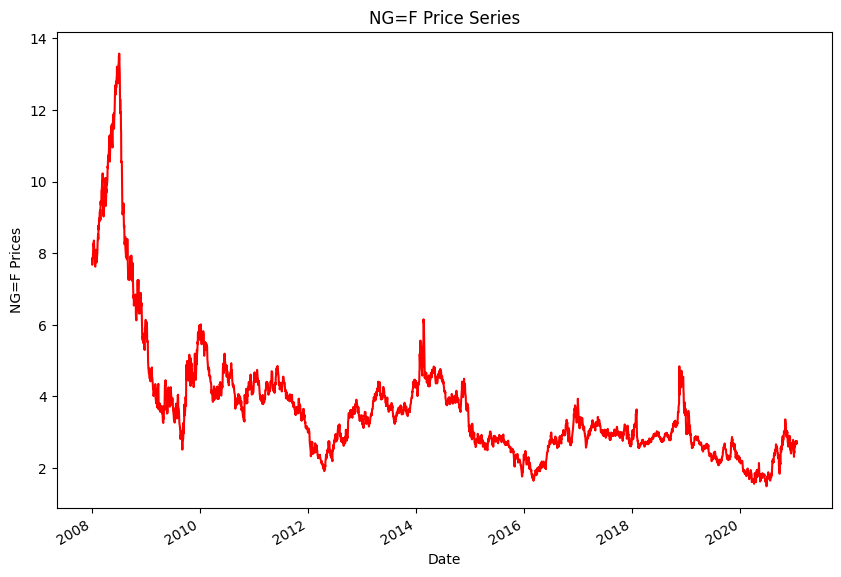

In [7]:
data.Close.plot(figsize=(10,7), color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

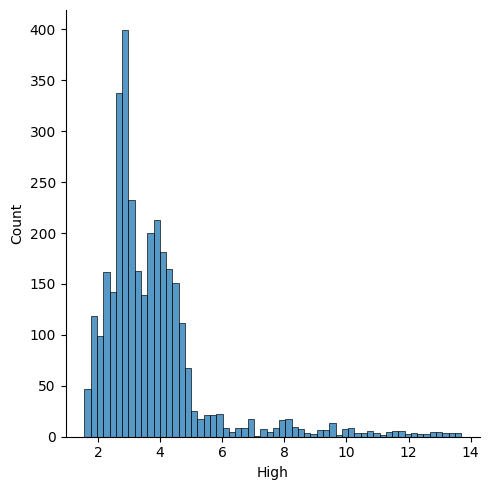

In [11]:
sns.displot(data["High"])

<AxesSubplot: xlabel='Close', ylabel='Count'>

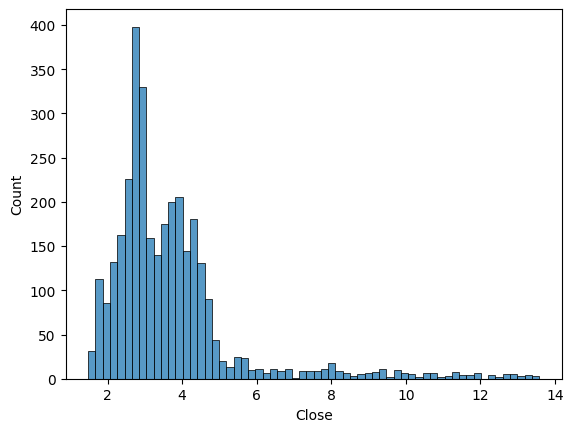

In [12]:
sns.histplot(data["Close"])

In [17]:
#Data Split
X = data.drop("Close", axis=1)
y = data["Close"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2625, 4)
(657, 4)
(2625,)
(657,)


In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
lpred = lm.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
def cal_met(y_test, pred):    
    mse = mean_squared_error(y_test, pred)
    rmse =np.sqrt(mse)
    score = r2_score(y_test, pred)
    print(mse)
    print(rmse)
    print(score)

In [24]:
cal_met(y_test, lpred)

0.0015345662928876315
0.03917354072441795
0.9994383299702705


In [25]:
from sklearn.linear_model import Lasso, Ridge
las = Lasso()
las.fit(X_train, y_train)
laspred = las.predict(X_test)

rid = Ridge()
rid.fit(X_train, y_train)
ridpred = rid.predict(X_test)

cal_met(y_test, laspred)
cal_met(y_test, ridpred)

0.2369233626053286
0.48674774021594447
0.9132831519010187
0.0016151026199614476
0.040188339353118926
0.9994088526896658


In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid= { "C":[0.1, 1, 10, 100, 1000],
             "gamma":[1, 0.1, 0.01, 0.001, 0.0001],
             "kernel":["rbf"]
    
}

grid= GridSearchCV(svr, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.4s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.4s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.7s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   0.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.6s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.001 total time=   0.6s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.006 total time=   0.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.004 total time=   0.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.003 total time=   0.5s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.004 total time=   0.5s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.012 total time=   0.6s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.002 total time=   0.7s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.008 total time=   0.5s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [30]:
import joblib
joblib.dump(rid, "model.pkl")

['model.pkl']

In [31]:
ridge_model = joblib.load("model.pkl")

In [35]:
ridge_model.predict(X_test)

array([ 2.78852423,  5.71399285,  2.68223289,  5.94383461,  2.11294805,
       12.81415491,  3.96503268,  4.87658247,  1.79738876,  4.76402878,
        2.88202612,  3.52847878,  2.7879178 ,  2.97991435,  4.22769464,
        2.47576227,  4.14272872,  4.57878491,  9.0029845 ,  2.93329549,
        4.4204578 ,  2.6680961 ,  2.5442989 ,  2.35002784,  2.85089038,
        1.97589041,  2.77761708,  3.91164529,  3.29654453,  4.74890572,
        4.01514639,  2.70880519, 11.71291121,  4.2417215 ,  4.396539  ,
        3.67771052,  3.52487053,  5.33262773,  3.66050761,  3.431169  ,
        3.95794458,  2.43084403,  2.68169127,  2.61187105,  3.12464146,
        4.42801536,  4.26871275,  2.76454417,  3.85267153,  1.99539303,
        4.10942583,  2.4549955 ,  2.27636269,  3.97082299,  1.92815127,
        3.24231583,  3.76116916,  4.96877332,  4.32682976,  3.40616507,
        2.71130076,  3.91293136,  4.75586441,  3.16257493,  2.45049462,
        2.55599239,  4.37366245,  3.91233082,  2.40246887,  2.85